### Credit Card Fraud 

You create a classification model and get 90% accuracy immediately. “Fantastic” you think. You dive a little deeper and discover that 90% of the data belongs to one class. Damn!

This is an example of an imbalanced dataset and the frustrating results it can cause.

In this post you will discover the tactics that you can use to deliver great results on machine learning datasets with imbalanced data.

Here is the three solution which I have used frequently.

    1. UnderSampling
    2. OverSampling    
    3. Balanced Weight Model

#### Load Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing
from sklearn.preprocessing import StandardScaler

# Model Selection
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV, RandomizedSearchCV

#Handing Imbalance Dataset
from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import RandomOverSampler

# Model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Metrics
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc, precision_recall_curve, accuracy_score, f1_score

# Warnings
import warnings as ws
ws.filterwarnings('ignore')

pd.pandas.set_option('display.max_columns',None)

#### Load Dataset 

In [328]:
data = pd.read_csv('creditcard.csv')
data.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.000,-1.360,-0.073,2.536,1.378,-0.338,0.462,0.240,0.099,0.364,0.091,-0.552,-0.618,-0.991,-0.311,1.468,-0.470,0.208,0.026,0.404,0.251,-0.018,0.278,-0.110,0.067,0.129,-0.189,0.134,-0.021,149.620,0
1,0.000,1.192,0.266,0.166,0.448,0.060,-0.082,-0.079,0.085,-0.255,-0.167,1.613,1.065,0.489,-0.144,0.636,0.464,-0.115,-0.183,-0.146,-0.069,-0.226,-0.639,0.101,-0.340,0.167,0.126,-0.009,0.015,2.690,0
2,1.000,-1.358,-1.340,1.773,0.380,-0.503,1.800,0.791,0.248,-1.515,0.208,0.625,0.066,0.717,-0.166,2.346,-2.890,1.110,-0.121,-2.262,0.525,0.248,0.772,0.909,-0.689,-0.328,-0.139,-0.055,-0.060,378.660,0
3,1.000,-0.966,-0.185,1.793,-0.863,-0.010,1.247,0.238,0.377,-1.387,-0.055,-0.226,0.178,0.508,-0.288,-0.631,-1.060,-0.684,1.966,-1.233,-0.208,-0.108,0.005,-0.190,-1.176,0.647,-0.222,0.063,0.061,123.500,0
4,2.000,-1.158,0.878,1.549,0.403,-0.407,0.096,0.593,-0.271,0.818,0.753,-0.823,0.538,1.346,-1.120,0.175,-0.451,-0.237,-0.038,0.803,0.409,-0.009,0.798,-0.137,0.141,-0.206,0.502,0.219,0.215,69.990,0


In [329]:
data.shape

(284807, 31)

1. Hence we can see there are 284,807 rows and 31 columns which is a huge data.
2. Time is also in float here mean it can be only seconds starting from a particular time.

0   99.830
1    0.170
Name: Class, dtype: float64


Text(0.5, 1.0, 'Class')

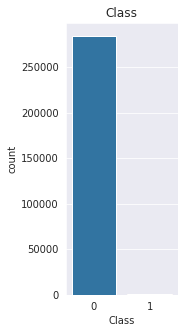

In [330]:
print(np.round(data['Class'].value_counts()/data.shape[0] * 100,2))

plt.figure(figsize = (2,5))
sns.set_style('darkgrid')
sns.countplot(x = 'Class', data = data)
plt.title('Class')


From the plot above, we can see we have a very imbalanced class - just 0.17% of our dataset belong to the target class!

This is a problem because many machine learning models are designed to maximize overall accuracy, which especially with imbalanced classes may not be the best metric to use.

Before doing ML part, Let's understand the data

In [331]:
# Summary
def summary(data):
    df = {
     'Count' : data.shape[0],
     'NA values' : data.isna().sum(),
     '% NA' : round((data.isna().sum()/data.shape[0]) * 100, 2),
     'Unique' : data.nunique(),
     'Dtype' : data.dtypes
    } 
    return(pd.DataFrame(df))

print('Shape is :', data.shape)
summary(data)


Shape is : (284807, 31)


,Count,NA values,% NA,Unique,Dtype
Time,284807,0,0.000,124592,float64
V1,284807,0,0.000,275663,float64
V2,284807,0,0.000,275663,float64
V3,284807,0,0.000,275663,float64
V4,284807,0,0.000,275663,float64
V5,284807,0,0.000,275663,float64
V6,284807,0,0.000,275663,float64
V7,284807,0,0.000,275663,float64
V8,284807,0,0.000,275663,float64
V9,284807,0,0.000,275663,float64


In [356]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.00000,284807.00000,284807.00000,284807.00000,284807.00000,284807.00000,284807.00000,284807.00000,284807.00000,284807.00000,284807.00000,284807.00000,284807.00000,284807.00000,284807.00000,284807.00000,284807.00000,284807.00000,284807.00000,284807.00000,284807.00000,284807.00000,284807.00000,284807.00000,284807.00000,284807.00000,284807.00000,284807.00000,284807.00000,284807.00000,284807.00000
mean,94813.85958,0.00000,0.00000,-0.00000,0.00000,-0.00000,0.00000,-0.00000,-0.00000,-0.00000,0.00000,0.00000,-0.00000,0.00000,0.00000,0.00000,0.00000,-0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,-0.00000,-0.00000,88.34962,0.00173
std,47488.14595,1.95870,1.65131,1.51626,1.41587,1.38025,1.33227,1.23709,1.19435,1.09863,1.08885,1.02071,0.99920,0.99527,0.95860,0.91532,0.87625,0.84934,0.83818,0.81404,0.77093,0.73452,0.72570,0.62446,0.60565,0.52128,0.48223,0.40363,0.33008,250.12011,0.04153
min,0.00000,-56.40751,-72.71573,-48.32559,-5.68317,-113.74331,-26.16051,-43.55724,-73.21672,-13.43407,-24.58826,-4.79747,-18.68371,-5.79188,-19.21433,-4.49894,-14.12985,-25.16280,-9.49875,-7.21353,-54.49772,-34.83038,-10.93314,-44.80774,-2.83663,-10.29540,-2.60455,-22.56568,-15.43008,0.00000,0.00000
25%,54201.50000,-0.92037,-0.59855,-0.89036,-0.84864,-0.69160,-0.76830,-0.55408,-0.20863,-0.64310,-0.53543,-0.76249,-0.40557,-0.64854,-0.42557,-0.58288,-0.46804,-0.48375,-0.49885,-0.45630,-0.21172,-0.22839,-0.54235,-0.16185,-0.35459,-0.31715,-0.32698,-0.07084,-0.05296,5.60000,0.00000
50%,84692.00000,0.01811,0.06549,0.17985,-0.01985,-0.05434,-0.27419,0.04010,0.02236,-0.05143,-0.09292,-0.03276,0.14003,-0.01357,0.05060,0.04807,0.06641,-0.06568,-0.00364,0.00373,-0.06248,-0.02945,0.00678,-0.01119,0.04098,0.01659,-0.05214,0.00134,0.01124,22.00000,0.00000
75%,139320.50000,1.31564,0.80372,1.02720,0.74334,0.61193,0.39856,0.57044,0.32735,0.59714,0.45392,0.73959,0.61824,0.66250,0.49315,0.64882,0.52330,0.39967,0.50081,0.45895,0.13304,0.18638,0.52855,0.14764,0.43953,0.35072,0.24095,0.09105,0.07828,77.16500,0.00000
max,172792.00000,2.45493,22.05773,9.38256,16.87534,34.80167,73.30163,120.58949,20.00721,15.59499,23.74514,12.01891,7.84839,7.12688,10.52677,8.87774,17.31511,9.25353,5.04107,5.59197,39.42090,27.20284,10.50309,22.52841,4.58455,7.51959,3.51735,31.61220,33.84781,25691.16000,1.00000


In [ ]:
df = data.copy()

# Standardize Amount Value
scale = StandardScaler()
df['Amount'] = scale.fit_transform(df[['Amount']])

### Model Building

Here we are going to use **LogisticRegression** model with multiple technique to handle imbalanced dataset. 

**Metrics :**

For Imbalanced dataset we can't consider accuracy metrics. Here our aim is to be reduce **Type2** error. So that **Recall** would be the best option. 

In [359]:
# Train Test Ratio
def train_test_ratio(y_train):
    
    class_0 = np.round(y_train.value_counts()[0]/len(y_train),3)
    class_1 = np.round(y_train.value_counts()[1]/len(y_train),3)
    
    len_class_0 = y_train.value_counts()[0]
    len_class_1 = y_train.value_counts()[1]
    
    print('-'*25)
    print('Train - Test Ratio :')
    print('-'*25)
    print('class 0 : {} : {} %'.format(len_class_0,class_0))
    print('class 1 : {} : {} %'.format(len_class_1,class_1))

In [ ]:
# Normalized Confusion Matrix
def get_norm_cnf_matrix(y_test, y_pred):

    # Noramalized Confusion Matrix
    y_test_0 = y_test.value_counts()[0]
    y_test_1 = y_test.value_counts()[1]    
    cnf_norm_matrix = np.array([[1.0 / y_test_0,1.0/y_test_0],[1.0/y_test_1,1.0/y_test_1]])
    norm_cnf_matrix = np.around(confusion_matrix(y_test, y_pred) * cnf_norm_matrix,3)
    
    return(norm_cnf_matrix)

In [ ]:
# Confusion Matrix
def plt_cnf_matrix(y_test,y_pred):
    
    # Confusion Matrix`
    cnf_matrix = confusion_matrix(y_test, y_pred)    
    
    # Normalized Confusion Matrix
    norm_cnf_matrix = get_norm_cnf_matrix(y_test, y_pred)
    
    # Confusion Matrix plot
    plt.figure(figsize = (15,3))
    plt.subplots_adjust(hspace = 0.5, wspace = 0.5)
    plt.subplot(1,2,1)
    sns.heatmap(cnf_matrix, annot = True, fmt = 'g', cmap = plt.cm.Blues)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix')
    
    # Noramalized Confusion Matrix Plot
    plt.subplot(1,2,2)
    plt.subplots_adjust(hspace = 0.5, wspace = 0.5)
    sns.heatmap(norm_cnf_matrix, annot = True, fmt = 'g', cmap = plt.cm.Blues)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')  
    plt.title('Normalized Confusion Matrix')
    plt.show()
    
    print('-'*25)
    print('Classification Report')
    print('-'*25)
    print(classification_report(y_test, y_pred))

In [ ]:
X = data.drop('Class', axis = 1)
Y = data['Class']

#### Base Model 

Here we do nothing. Simply we split dataset into train and test then predict target value

-------------------------
Train - Test Ratio :
-------------------------
class 0 : 284315 : 0.998 %
class 1 : 492 : 0.002 %
None


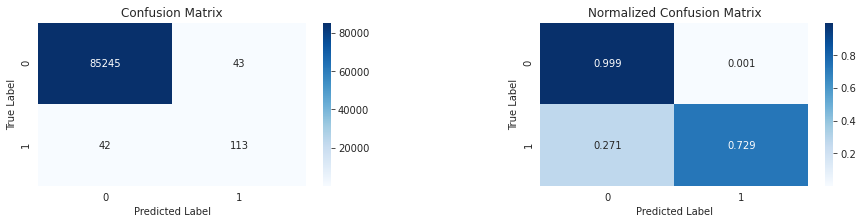

-------------------------
Classification Report
-------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85288
           1       0.72      0.73      0.73       155

    accuracy                           1.00     85443
   macro avg       0.86      0.86      0.86     85443
weighted avg       1.00      1.00      1.00     85443



In [363]:
x_train_base, x_test_base, y_train_base, y_test_base = train_test_split(X, Y, test_size = 0.3, random_state = 7)
print(train_test_ratio(Y))

base_model = LogisticRegression()
base_model.fit(x_train_base, y_train_base)

y_pred_base = base_model.predict(x_test_base)
plt_cnf_matrix(y_test_base, y_pred_base)

**Rcall** for base model class 1 is **0.729** 

#### Under Sampling :

This is the technique which reduce majority class upto reach minoriy class level. We shouldn't use when we don't have enough data for modeling. Otherwise we could loss required information

This technique may perform well in training dataset not in unseen dataset because of less training samples.

-------------------------
Train - Test Ratio :
-------------------------
class 0 : 492 : 0.5 %
class 1 : 492 : 0.5 %
None


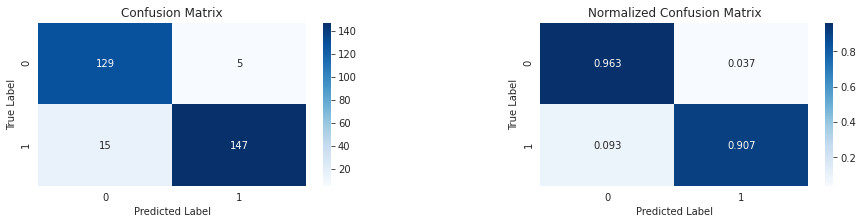

-------------------------
Classification Report
-------------------------
              precision    recall  f1-score   support

           0       0.90      0.96      0.93       134
           1       0.97      0.91      0.94       162

    accuracy                           0.93       296
   macro avg       0.93      0.94      0.93       296
weighted avg       0.93      0.93      0.93       296



In [364]:
under_sampling = NearMiss()
X_under, Y_under = under_sampling.fit_sample(X,Y)
 
print(train_test_ratio(Y_under))

x_train_under, x_test_under, y_train_under, y_test_under = train_test_split(X_under, Y_under, test_size = 0.3, random_state = 7)

under_sampling_model = LogisticRegression()
under_sampling_model.fit(x_train_under, y_train_under)

y_pred_under = under_sampling_model.predict(x_test_under)
plt_cnf_matrix(y_test_under, y_pred_under)

Here **Recall** of undersampling class 1 is 0.907. It seems much better than base model (0.73). Actually real problem occurs when we are facing unseen data.

We will evaluate all model with large data later.

#### Over Sampling

Here we replicate minority samples till reach majority count

In [ ]:
over_sampling = RandomOverSampler(random_state = 42)
X_over, Y_over = over_sampling.fit_sample(X,Y)
 
print(train_test_ratio(Y_over))

x_train_over, x_test_over, y_train_over, y_test_over = train_test_split(X_over, Y_over, test_size = 0.3, random_state = 7)

over_sampling_model = LogisticRegression()
over_sampling_model.fit(x_train_over, y_train_over)

y_pred_over = over_sampling_model.predict(x_test_over)
plt_cnf_matrix(y_test_over, y_pred_over)

**Recall** for over sampling is 0.909. 

#### Balanced Class Weight

This is technique gives more weightage to minority class. Due to this penalty model can able to predict well minority class on unseen data

In [ ]:
X_bal, Y_bal = X,Y

print(train_test_ratio(Y_over))

x_train_bal, x_test_bal, y_train_bal, y_test_bal = train_test_split(X_bal, Y_bal, test_size = 0.3, random_state = 42)

balanced_model = LogisticRegression(class_weight='balanced')
balanced_model.fit(x_train_bal, y_train_bal)

y_pred_bal = balanced_model.predict(x_test_bal)
plt_cnf_matrix(y_test_bal, y_pred_bal)

Balanced model predicts more fraud values as Fraud. **Recall** of Balanced model is 0.919.

Here we have trained 4 models. 
1. Base Model
2. Under Sampling Model
3. Over Sampling Model
4. Balanced Model

We should try all four model into our entire dataset.

In [ ]:
models = []
models.append(('Base Model', base_model))
models.append(('Under Sampling Model', under_sampling_model))
models.append(('Over Sampling Model', over_sampling_model))
models.append(('Balanced Model', balanced_model))

In [ ]:
def model_evaluation(y_train, y_pred):
    
    # Confusion Matrix
    cnf_matrix = confusion_matrix(y_train, y_pred)
    
    # Confusion Matrix Parameters
    tp = cnf_matrix[1,1] # True Poistive
    tn = cnf_matrix[0,0] # True Negative
    fn = cnf_matrix[1,0] # False Negative
    fp = cnf_matrix[0,1] # False Positive
    
    # True Positive Rate
    """ Howmany of the True correctly classified as True """
    tpr = tp/(tp+fn)
    
    # True Negative Rate
    """ Howmany of the False correctly classifier as False """
    tnr = tn/(tn+fp)
    
    # Precision (for True)
    """ Howmany of the predicted True actually True """
    precision = tp/(tp+fp)
    
    # F1 Score
    """ Weighted avg of Precision and Recall """
    fscore = f1_score(y_train, y_pred)
    
    # Accuracy
    acc = (tp+tn)/(tp+tn+fp+fn)

    return(tp,tn,fp,fn,tpr,tnr,precision,fscore,acc)

In [ ]:
model_evaluation(Y, Y_pred)

In [340]:
col = ['Model','TP','TN','FP','FN','TPR','TNR','Precision','F1 Score','Accuracy']
result = pd.DataFrame(columns = col)

i = 0
for name, model in models:
   
    Y_pred = model.predict(X)
    tp,tn,fp,fn,tpr,tnr,precision,fscore,acc = model_evaluation(Y, Y_pred)
    
    pd.set_option('display.float_format', lambda x: '%.3f' % x)
    result.loc[i] = [name,tp,tn,fp,fn,tpr,tnr,precision,fscore,acc]
    i+=1
    
result

,Model,TP,TN,FP,FN,TPR,TNR,Precision,F1 Score,Accuracy
0,Base Model,322,284187,128,170,0.654,1.000,0.716,0.684,0.999
1,Under Sampling Model,460,231140,53175,32,0.935,0.813,0.009,0.017,0.813
2,Over Sampling Model,447,274067,10248,45,0.909,0.964,0.042,0.080,0.964
3,Balanced Model,452,273767,10548,40,0.919,0.963,0.041,0.079,0.963


1. **Base Model**           : May gives better accuracy, But TPR is very less.
2. **Under Sampling Model** : It has higher TPR rate but FP is too high so precision is too low. Best model treats both  class as equal. Higher FP rate because it lost information about majority class while training.
3. **Over Sampling Model**  : TPR and Precision is good. But FN is high while compare to Balanced model
4. **Balanced Model**       : Over all performance is high while compare to other model.

So finaly we conclude of our model. Is that our final model? No. We have to tune our model to reach max performance.

#### Hyper Parameter Tuning

1. **C** : Regularization parameter. Nothing but lambda. If lambda is too low training time would be high. If lamda is high it may lead to overfitting. Cannot be negative value.
2. **penalty** : L1 means 'Lasso', L2 means 'Ridge', 'elasticnet', None
3. **class_weight** : Give weightage to class. balanced or user defined weights (i.e 'class_weight' : {0:1, 1: [1,50,100,500,1000,10000]})

In [353]:
estimater = LogisticRegression(class_weight='balanced')
hyperparameters = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'penalty' : ['l1','l2','elasticnet', 'none']
}

x_train_bal, x_test_bal, y_train_bal, y_test_bal = train_test_split(X_bal, Y_bal, test_size = 0.3, random_state = 42)

rm_model = RandomizedSearchCV(estimater, hyperparameters, random_state=1, n_iter=100, cv=5, verbose=0, n_jobs=-1)
best_model = rm_model.fit(x_train_bal, y_train_bal)

In [354]:
rm_best_model = best_model.best_estimator_
rm_best_model

LogisticRegression(C=0.001, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [355]:
y_rm_pred = rm_best_model.predict(X)

tp,tn,fp,fn,tpr,tnr,precision,fscore,acc = model_evaluation(Y, y_rm_pred)
result.loc[5] = ['Tunned Model',tp,tn,fp,fn,tpr,tnr,precision,fscore,acc]
result

,Model,TP,TN,FP,FN,TPR,TNR,Precision,F1 Score,Accuracy
0,Base Model,322,284187,128,170,0.654,1.000,0.716,0.684,0.999
1,Under Sampling Model,460,231140,53175,32,0.935,0.813,0.009,0.017,0.813
2,Over Sampling Model,447,274067,10248,45,0.909,0.964,0.042,0.080,0.964
3,Balanced Model,452,273767,10548,40,0.919,0.963,0.041,0.079,0.963
5,Tunned Model,448,273591,10724,44,0.911,0.962,0.040,0.077,0.962


Tunned model is well optimized our final model 

### Conclusion

Our final model gives us 91.1% TPR(Recall) value. Here I am trying only with LogisticRegression. We have try it for other ML models. Thay would have performed well.